In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("creditcard_2023.csv")
df.describe()

id            V1            V2            V3            V4  \
count  568630.000000  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   284314.500000 -5.638058e-17 -1.319545e-16 -3.518788e-17 -2.879008e-17   
std    164149.486121  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min         0.000000 -3.495584e+00 -4.996657e+01 -3.183760e+00 -4.951222e+00   
25%    142157.250000 -5.652859e-01 -4.866777e-01 -6.492987e-01 -6.560203e-01   
50%    284314.500000 -9.363846e-02 -1.358939e-01  3.528579e-04 -7.376152e-02   
75%    426471.750000  8.326582e-01  3.435552e-01  6.285380e-01  7.070047e-01   
max    568629.000000  2.229046e+00  4.361865e+00  1.412583e+01  3.201536e+00   

                 V5            V6            V7            V8            V9  \
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   7.997245e-18 -3.958636e-17 -3.198898e-17  2.109273e-17  3.998623e-17   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -9.952786e+00 -2.111111e+01 -4.351839e+00 -1.075634e+01 -3.751919e+00   
25%   -2.934955e-01 -4.458712e-01 -2.835329e-01 -1.922572e-01 -5.687446e-01   
50%    8.108788e-02  7.871758e-02  2.333659e-01 -1.145242e-01  9.252647e-02   
75%    4.397368e-01  4.977881e-01  5.259548e-01  4.729905e-02  5.592621e-01   
max    4.271689e+01  2.616840e+01  2.178730e+02  5.958040e+00  2.027006e+01   

       ...           V21           V22           V23           V24  \
count  ...  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   ...  4.758361e-17  3.948640e-18  6.194741e-18 -2.799036e-18   
std    ...  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min    ... -1.938252e+01 -7.734798e+00 -3.029545e+01 -4.067968e+00   
25%    ... -1.664408e-01 -4.904892e-01 -2.376289e-01 -6.515801e-01   
50%    ... -3.743065e-02 -2.732881e-02 -5.968903e-02  1.590123e-02   
75%    ...  1.479787e-01  4.638817e-01  1.557153e-01  7.007374e-01   
max    ...  8.087080e+00  1.263251e+01  3.170763e+01  1.296564e+01   

                V25           V26           V27           V28         Amount  \
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  568630.000000   
mean  -3.178905e-17 -7.497417e-18 -3.598760e-17  2.609101e-17   12041.957635   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00    6919.644449   
min   -1.361263e+01 -8.226969e+00 -1.049863e+01 -3.903524e+01      50.010000   
25%   -5.541485e-01 -6.318948e-01 -3.049607e-01 -2.318783e-01    6054.892500   
50%   -8.193162e-03 -1.189208e-02 -1.729111e-01 -1.392973e-02   12030.150000   
75%    5.500147e-01  6.728879e-01  3.340230e-01  4.095903e-01   18036.330000   
max    1.462151e+01  5.623285e+00  1.132311e+02  7.725594e+01   24039.930000   

          Class  
count  568630.0  
mean        0.5  
std         0.5  
min         0.0  
25%         0.0  
50%         0.5  
75%         1.0  
max         1.0  

[8 rows x 31 columns]

<Axes: xlabel='Class', ylabel='count'>

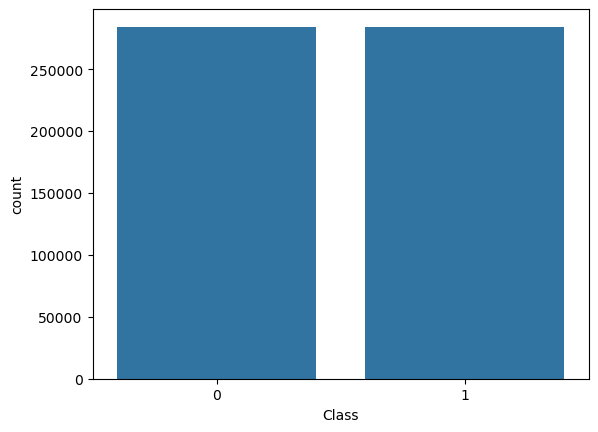

In [3]:
sns.countplot(data=df, x='Class')

## Distribution of Fraud
The above chaert shows that this data is not imbalanced which makes our analysis and task of prediction simpler

<Axes: >

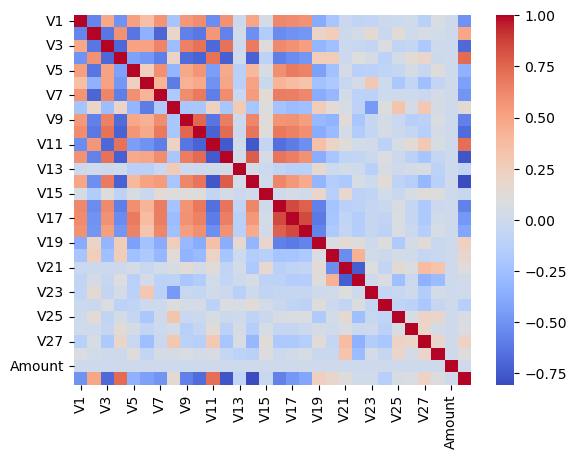

In [4]:
sns.heatmap(df.drop("id", axis = 1).corr(), cmap='coolwarm', annot=False)

## Heatmap interpretation

* The fact that there is correlation between the PCA variables shows that the realtionship is non-linear 
* This also suggest there is some multicolinearity which may negatively impact the performace of some models like
* Variables V14, V10, V11, V12, V1, V2, V3, V4 are all highly correlated with fraud

Text(0.5, 0, 'Absoloute correlation with Fraud')

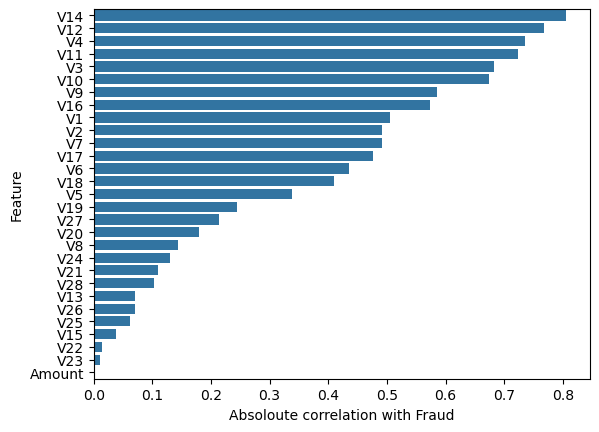

In [5]:
x = df.corr()['Class'].abs().sort_values(ascending=False).drop(["Class", "id"])

plt.figure()
sns.barplot(x = x, y= x.index )
plt.ylabel("Feature")
plt.xlabel("Absoloute correlation with Fraud")

## Correlation barplot interpretation

* The bar plot shows a steep dropoff in correlation followed by a brief plateu and then another dratic dropoff.
* It may be worthwhile to attempt to train classifiers on all features, just those before the plateu and including the plateu to compare performace

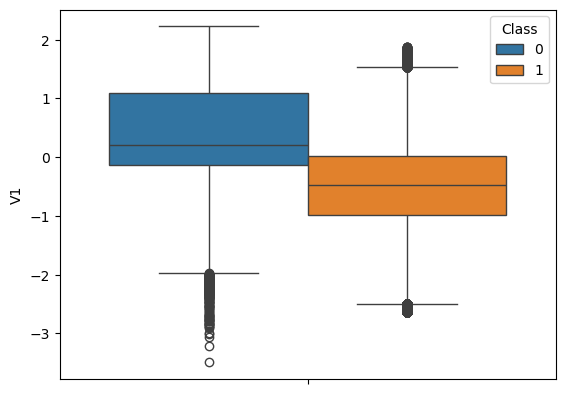

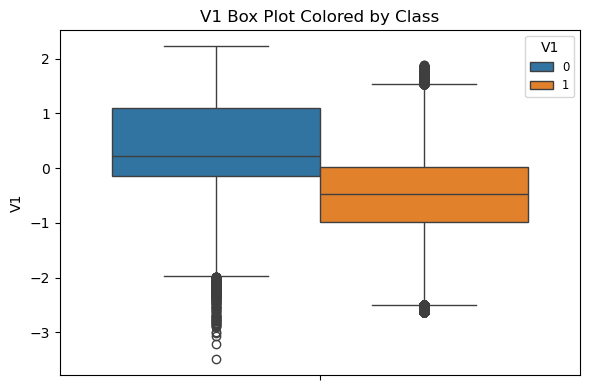

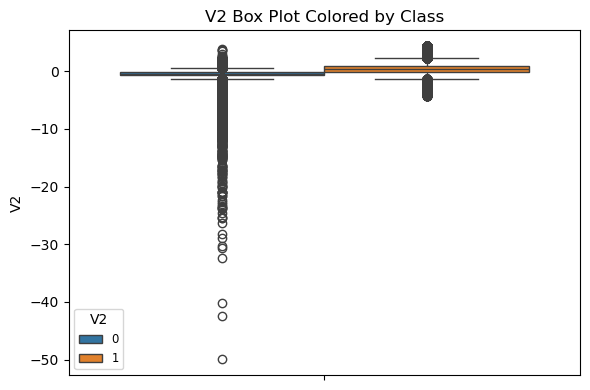

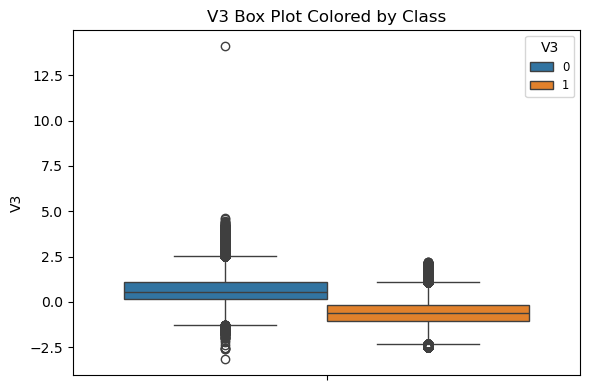

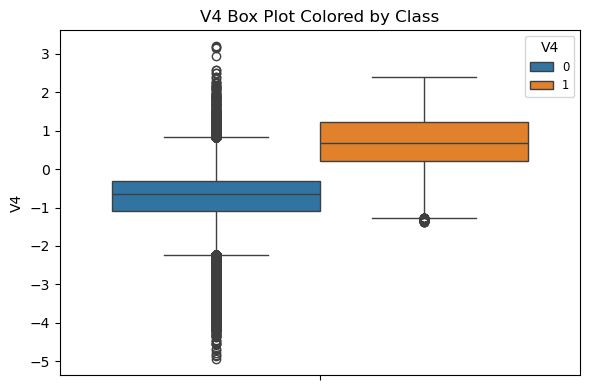

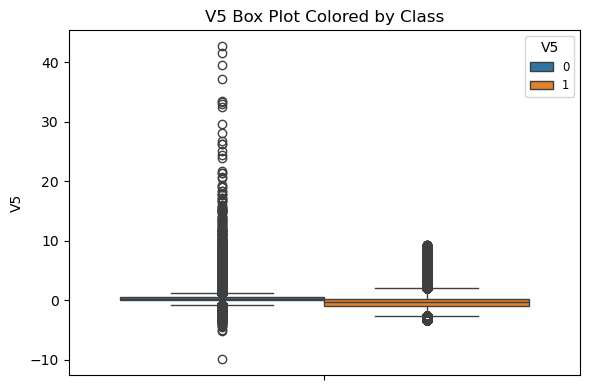

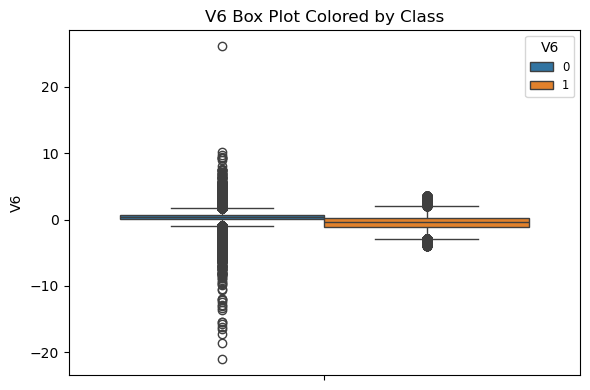

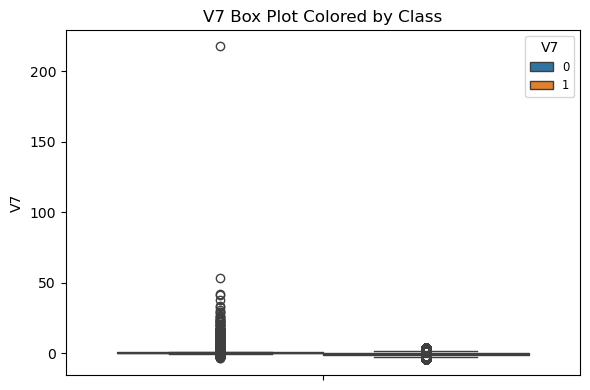

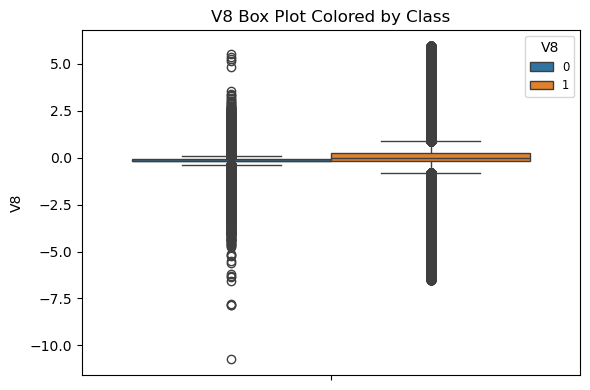

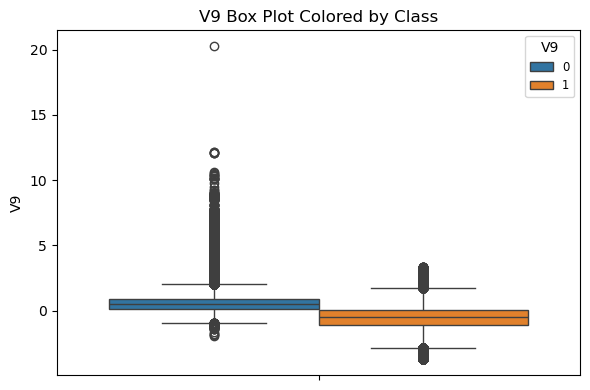

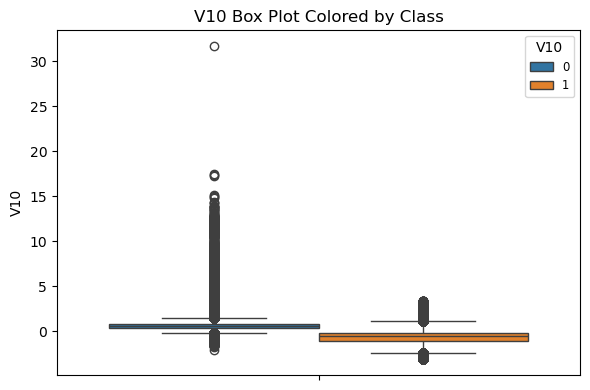

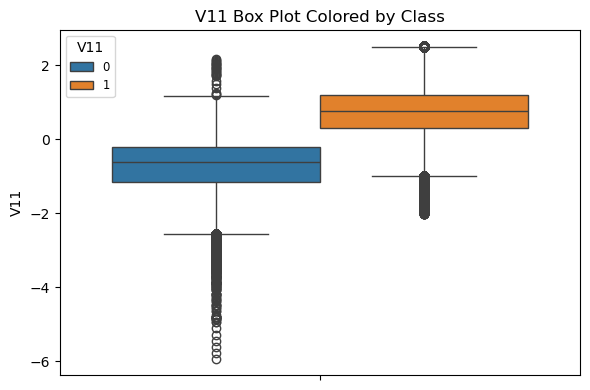

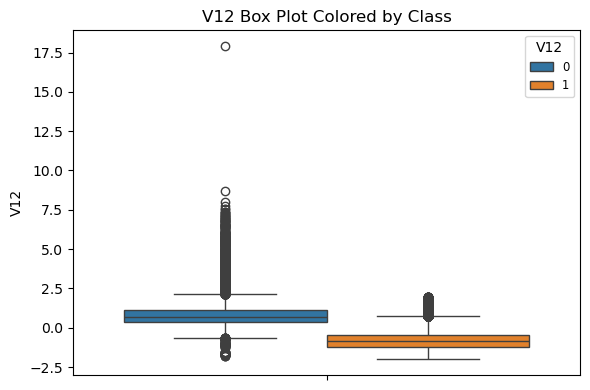

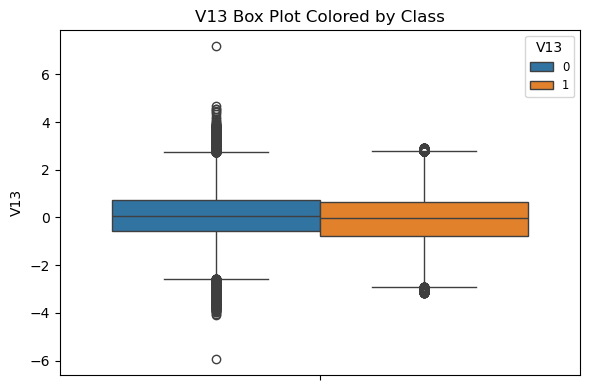

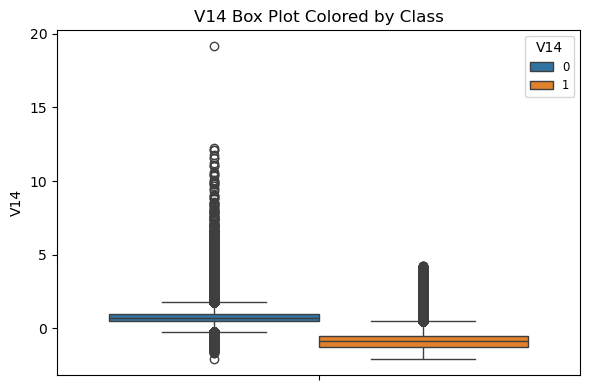

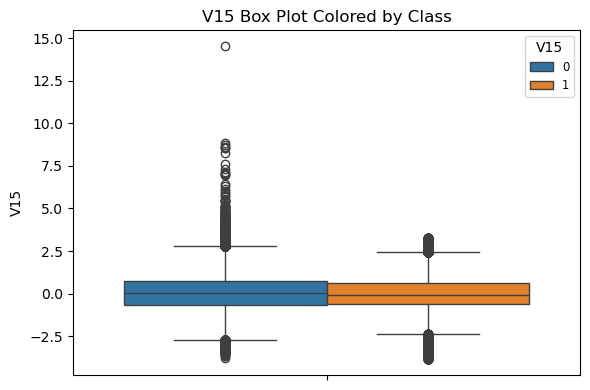

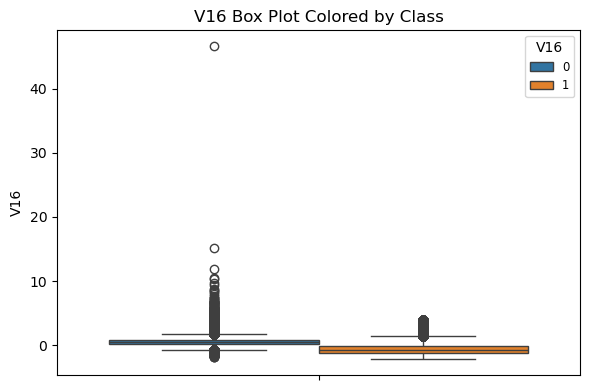

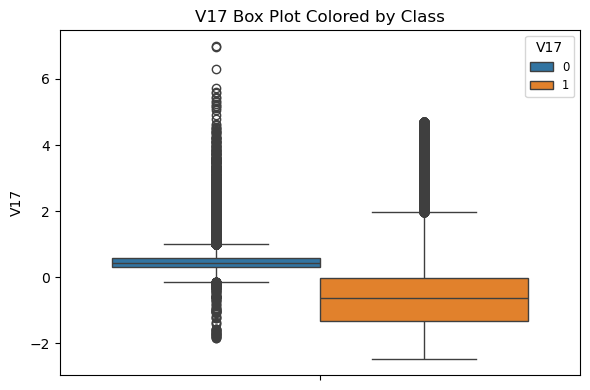

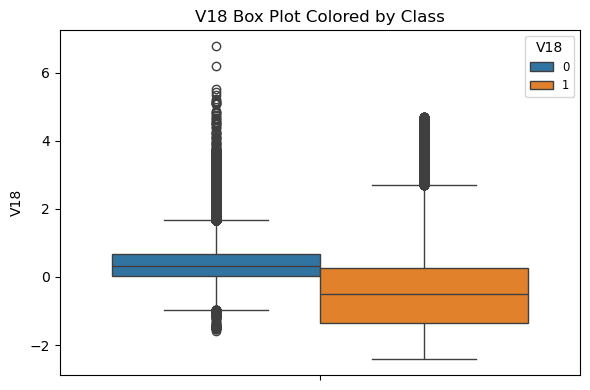

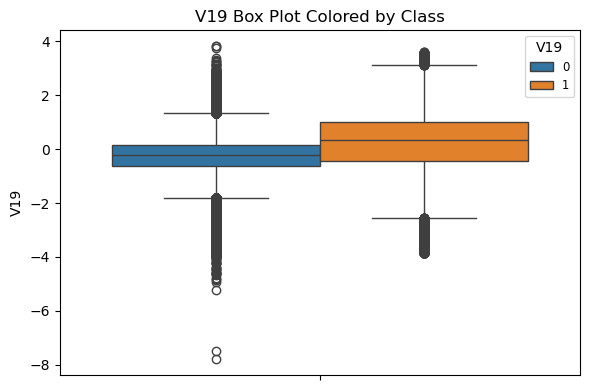

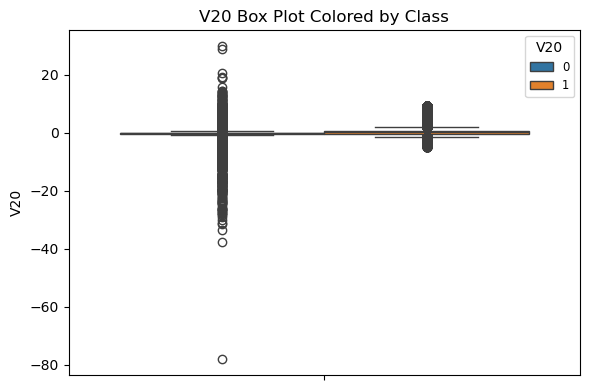

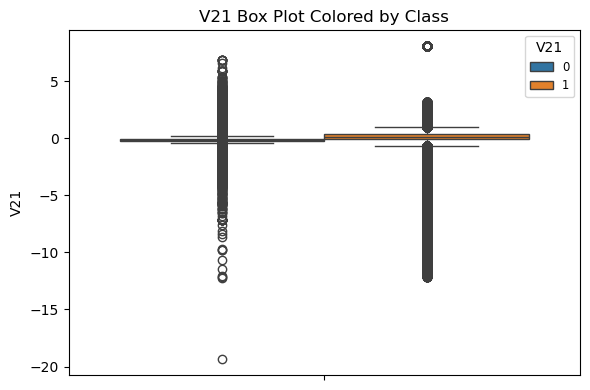

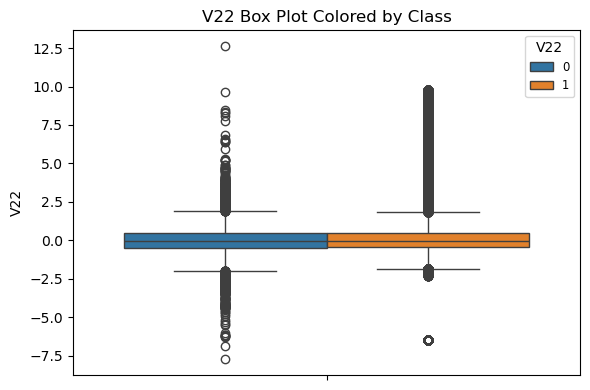

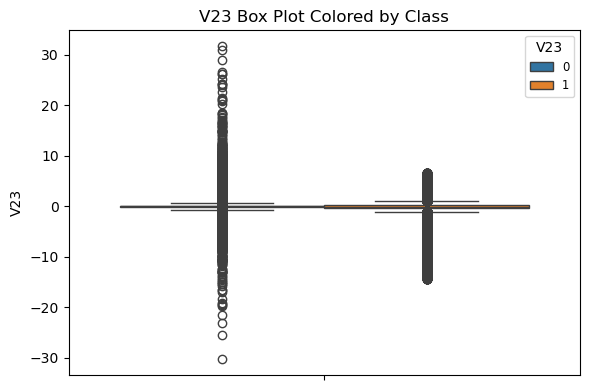

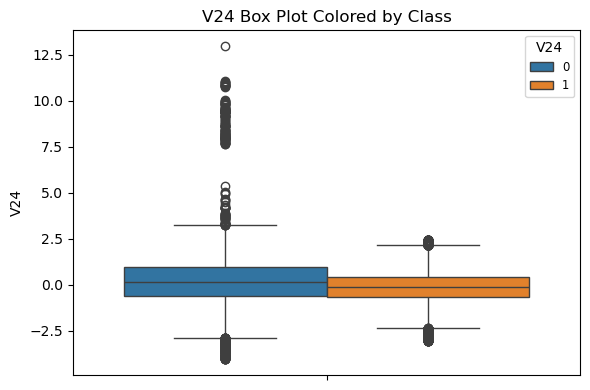

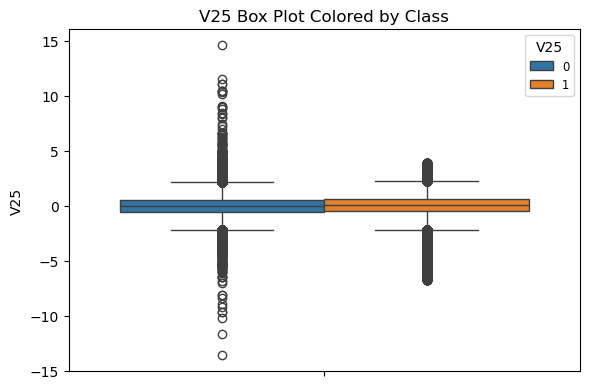

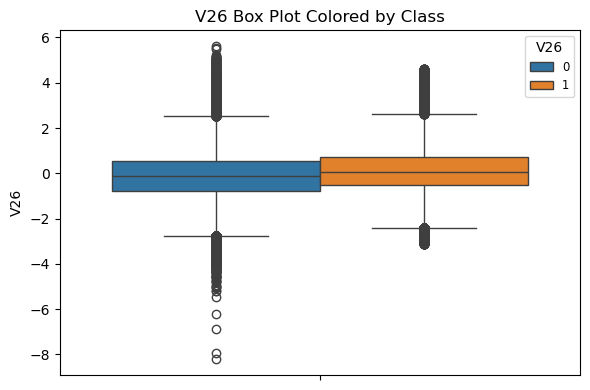

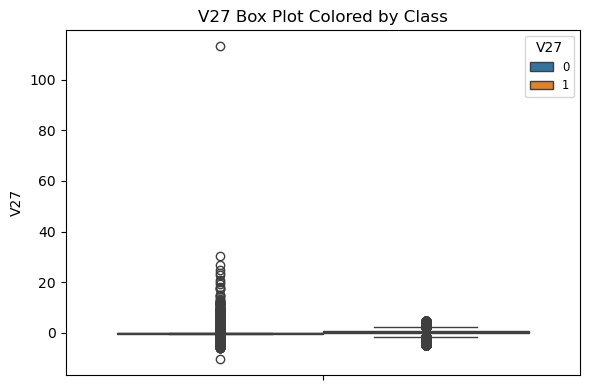

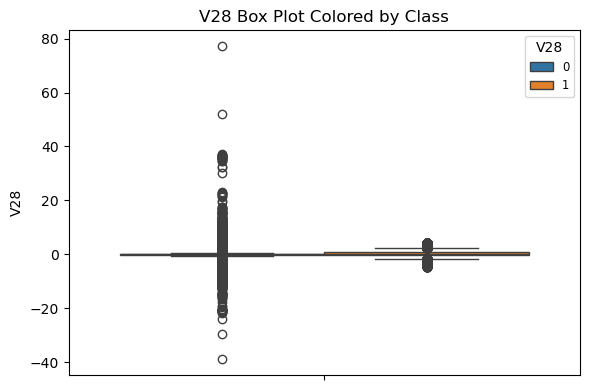

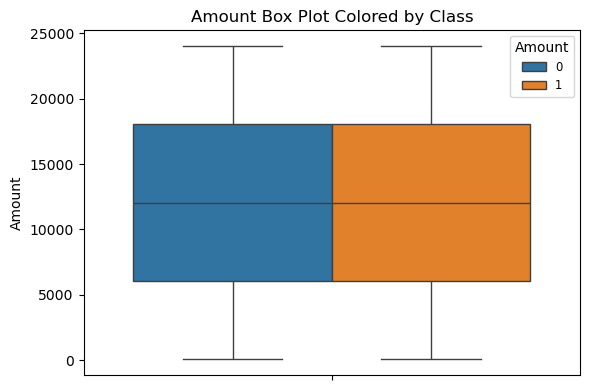

In [6]:
feature_cols = [col for col in df.columns if col not in ['id', 'Class']]

sns.boxplot(df, y = "V1", hue = "Class")

# Loop through each feature and plot
for feature in feature_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(
        data=df,
        y = df[feature], 
        hue="Class",
    )
    plt.title(f'{feature} Box Plot Colored by Class')
    plt.legend(loc='best', fontsize='small', title=feature)
    plt.tight_layout()
    plt.show()


## Boxplot interpretation

* The above boxplots show that the central tendency of some of the features differs greatly between fraudulant and non-fraudulant transactions
while ofther features such as V13, V15, V22, V23, V24, V25, V26, amount do not differ. 
* It may be useful to remove these features in linear models like logit and SVM

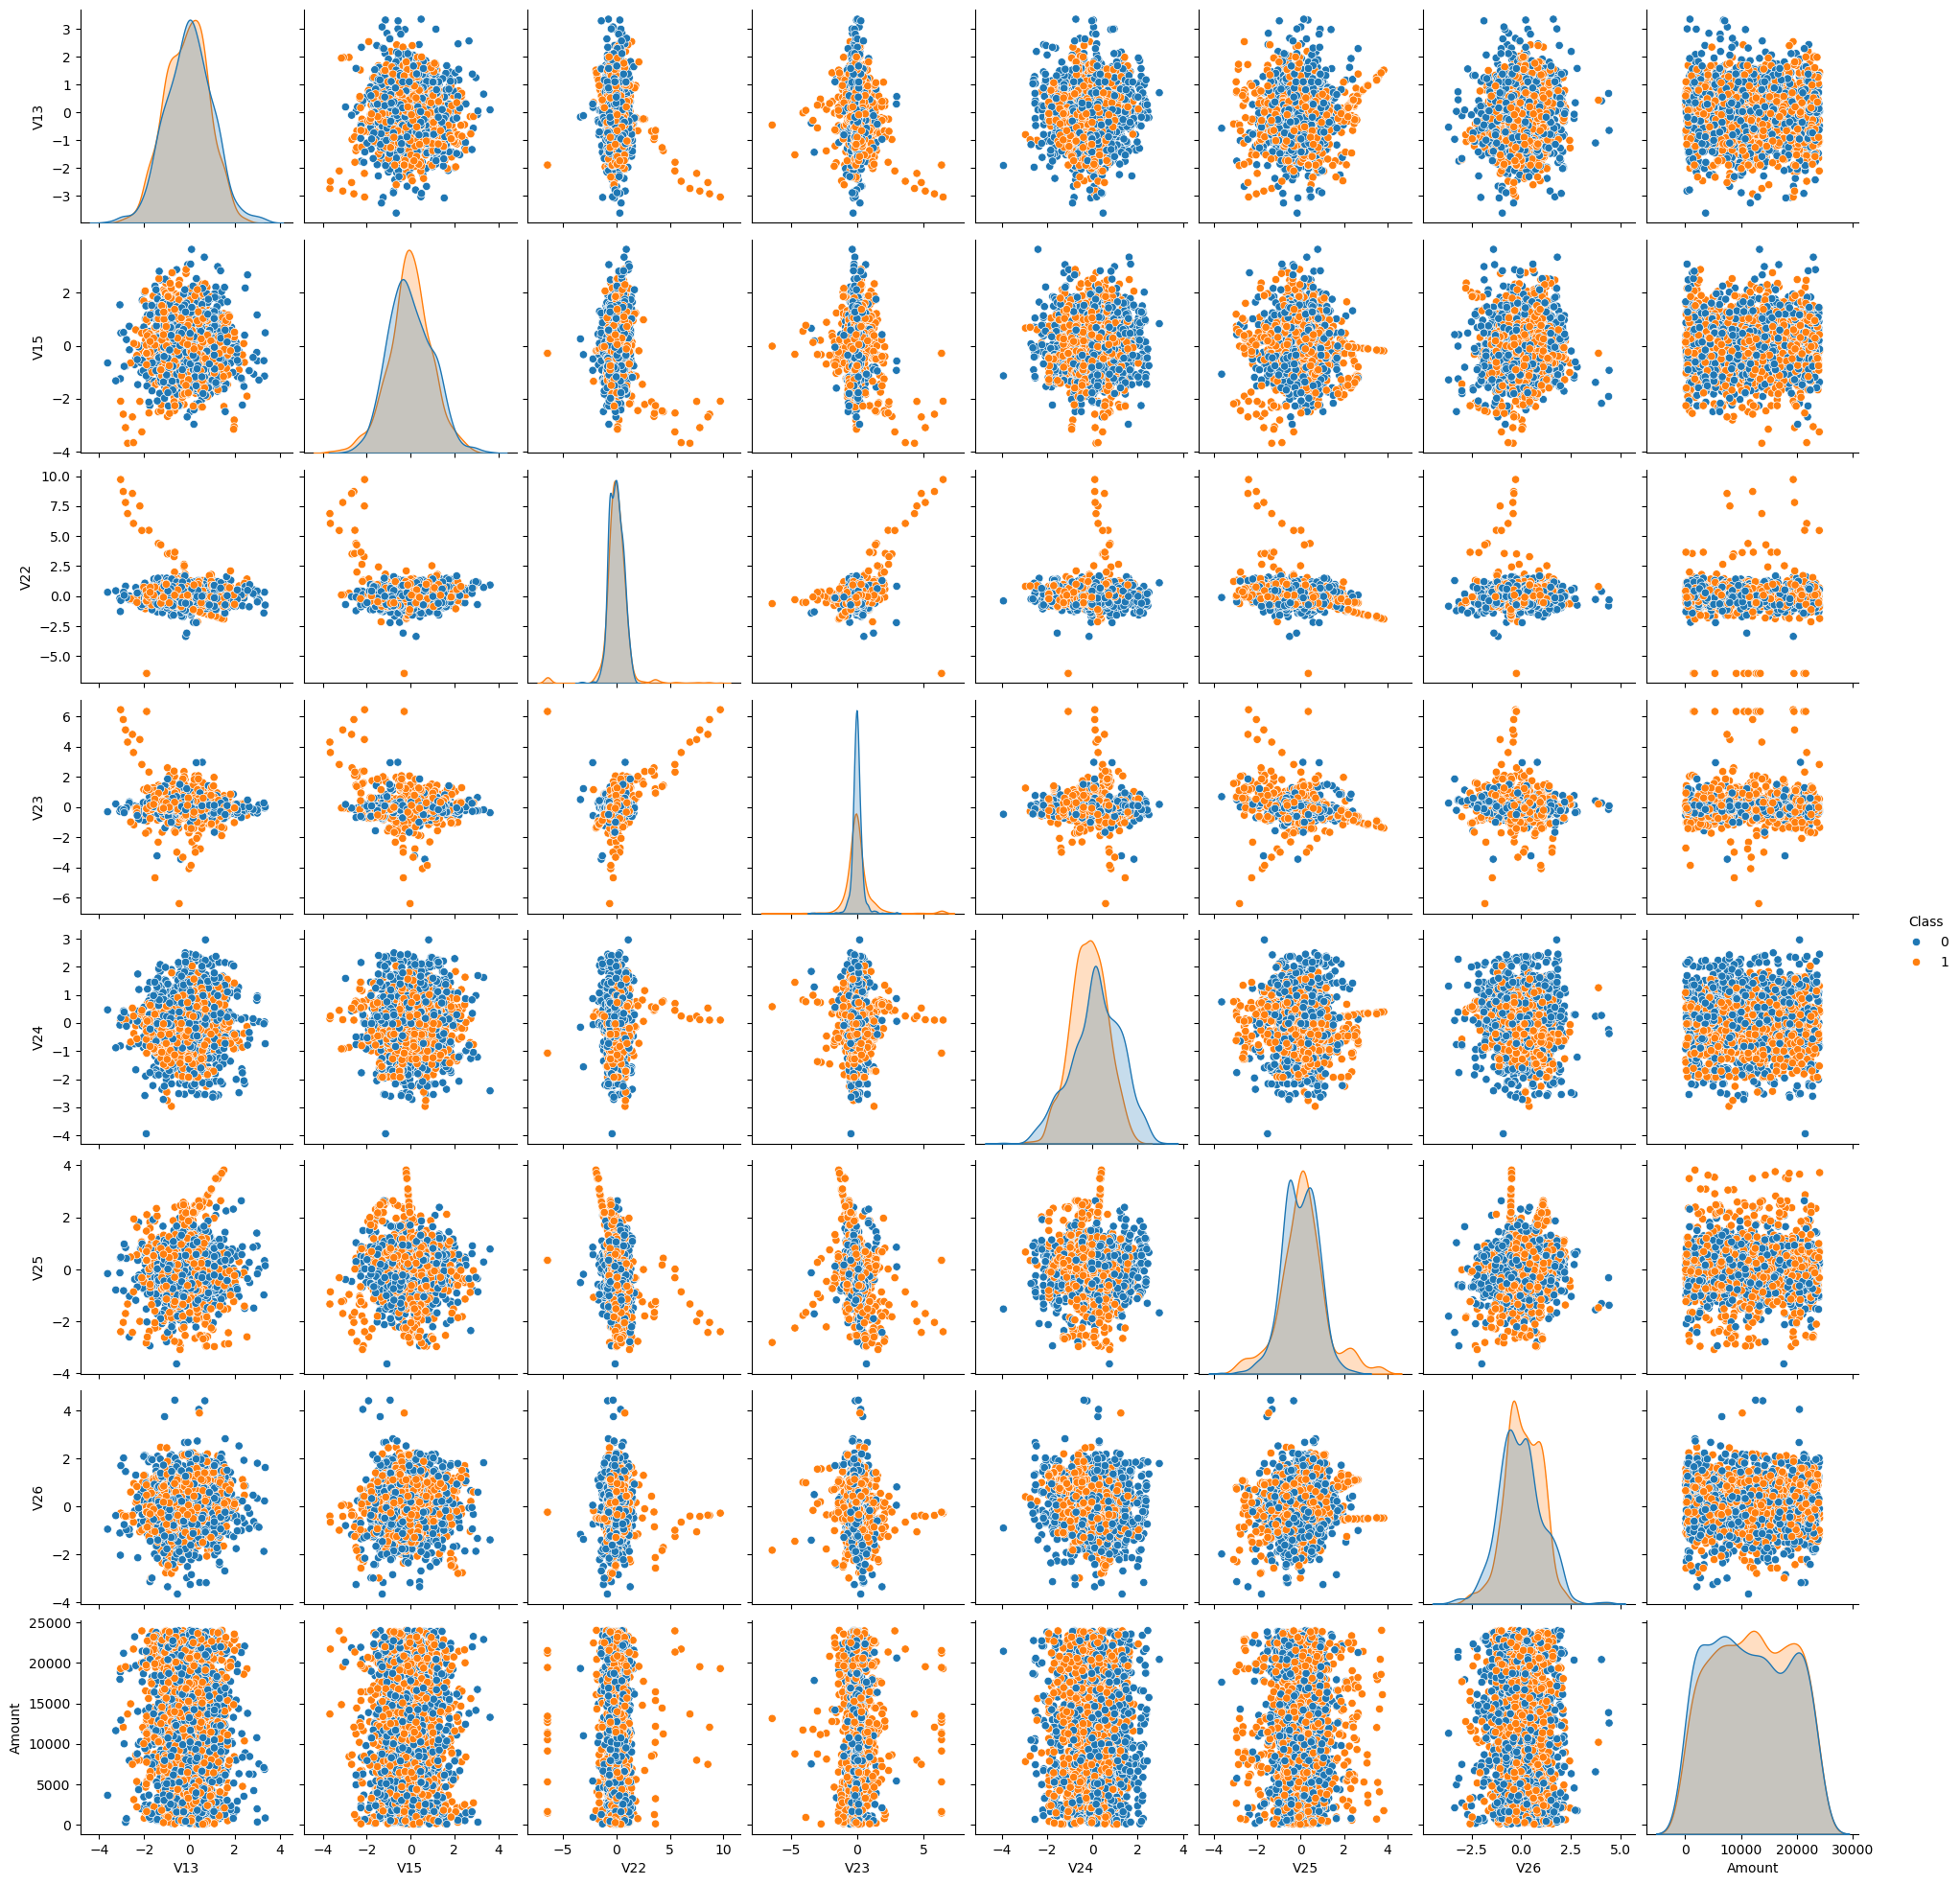

In [7]:
stats_df = df.sample(2000, random_state= 27)
sns.pairplot(stats_df, vars=['V13', 'V15', 'V22', 'V23', 'V24', 'V25', 'V26', 'Amount'], hue='Class', diag_kind='kde')

This pairplot confirms that these variables are not good predictors of class

<Axes: >

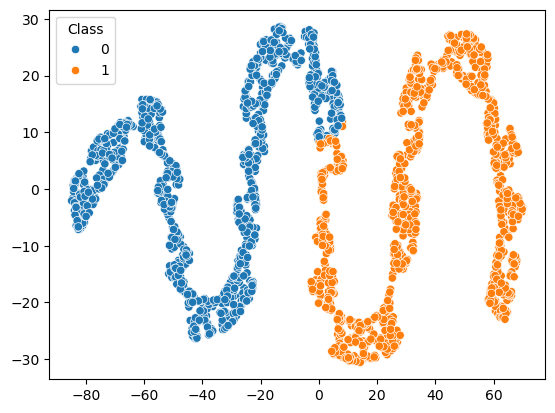

In [8]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=27)
X_tsne = tsne.fit_transform(stats_df.drop('Class', axis=1))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=stats_df['Class'])

This shows clear clustering and separation between the classes. 
This suggests that the class is learnable. 
The Tsne result cannot be used directly to predict as it is does not generalize well, non-deterministic and slow.
We can use this to check which variables are good predictors of the clusters and thus should be relevant for predicting class

<Axes: >

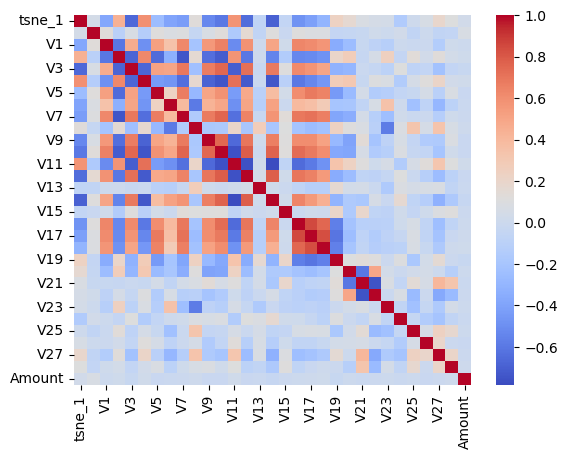

In [10]:
sns.heatmap(stats_df[['tsne_1', 'tsne_2'] + feature_cols].corr(), 
            cmap='coolwarm', annot=False)

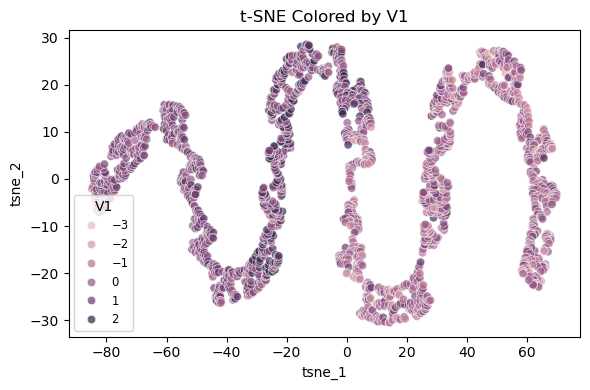

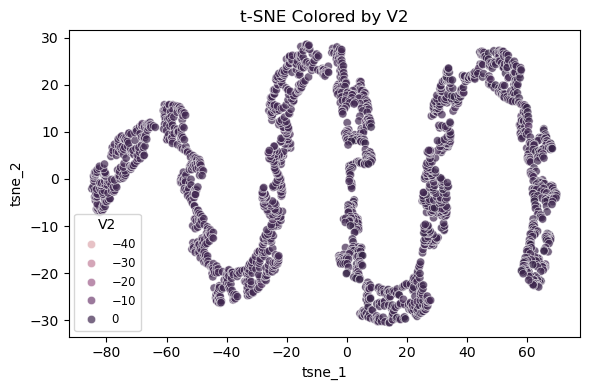

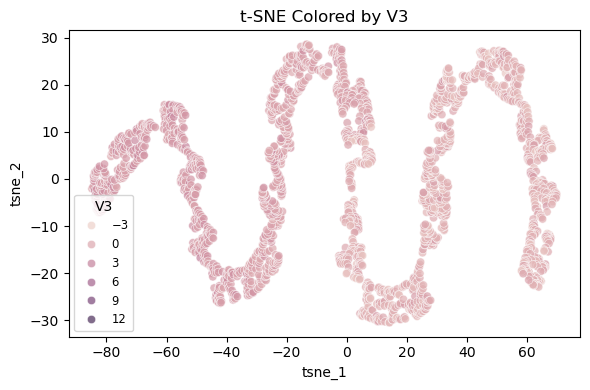

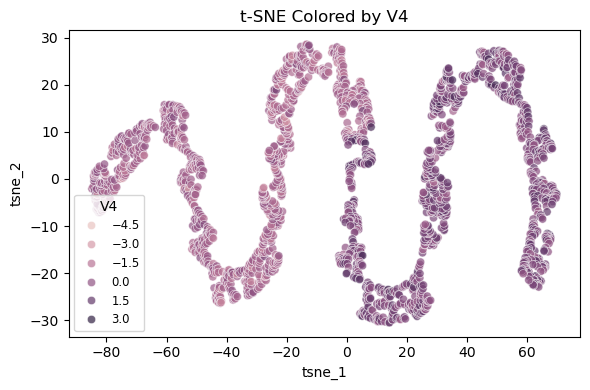

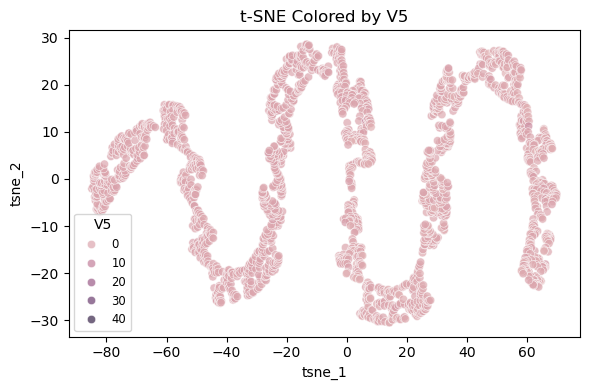

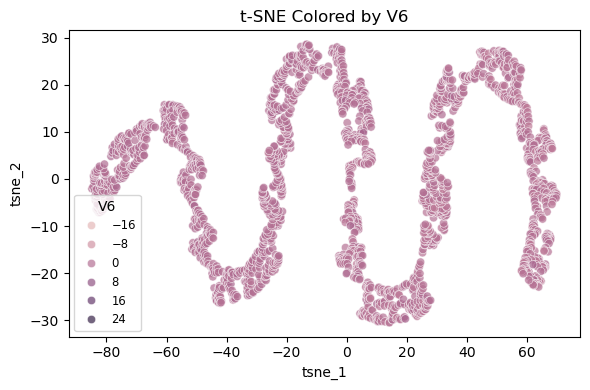

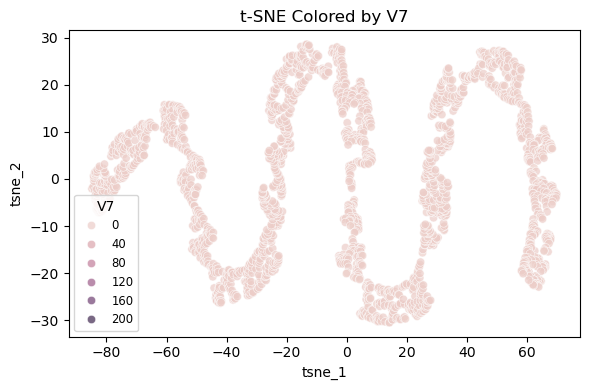

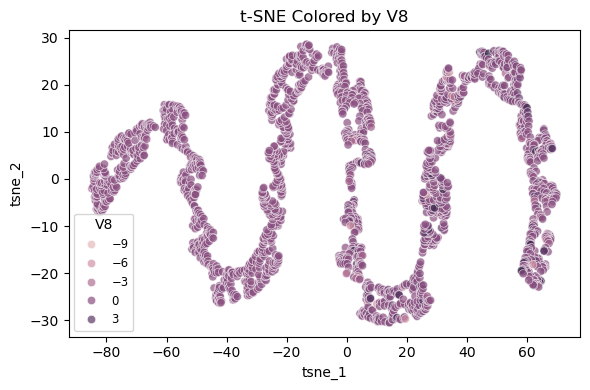

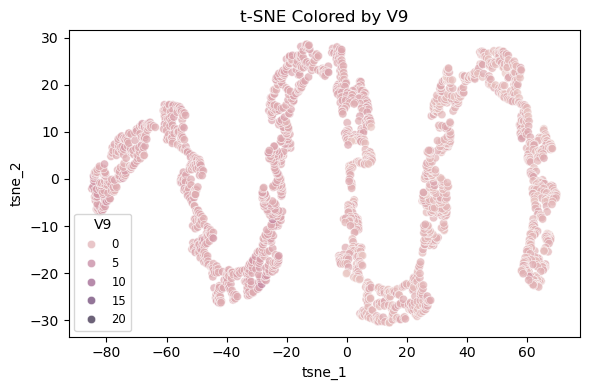

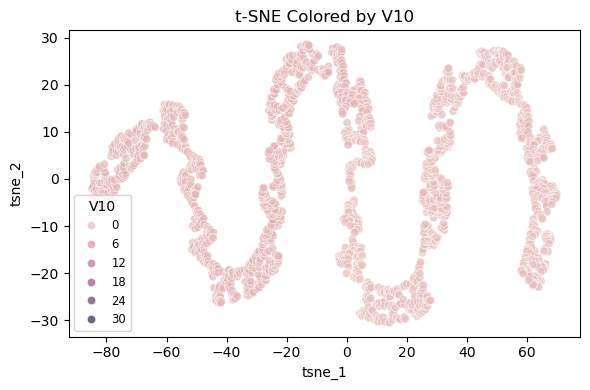

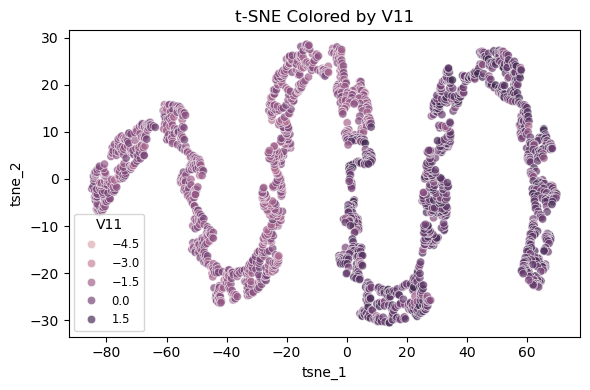

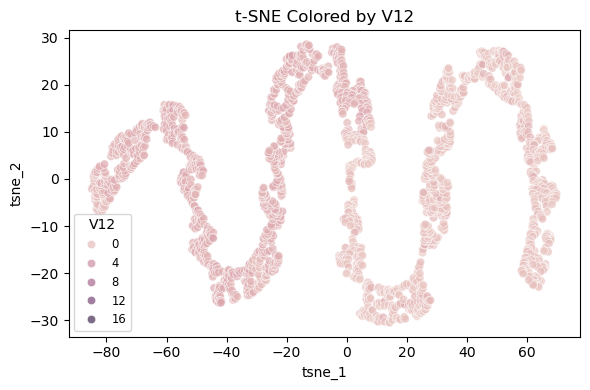

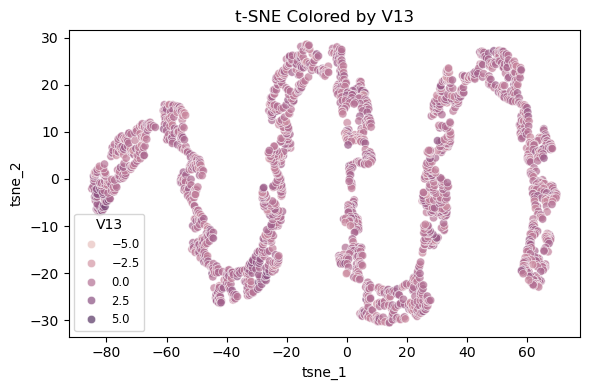

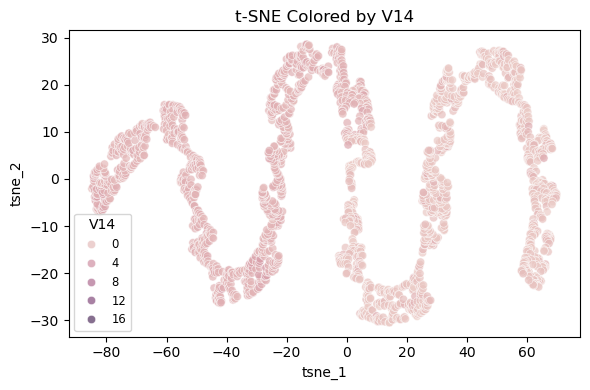

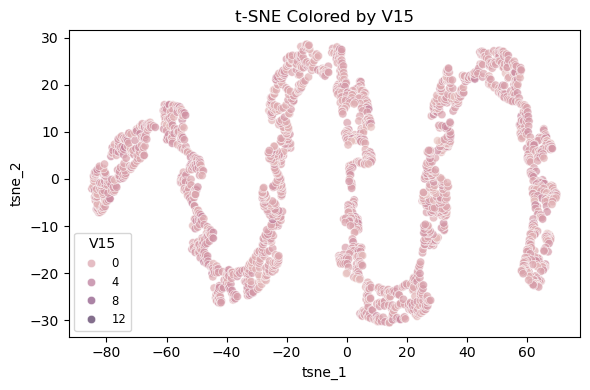

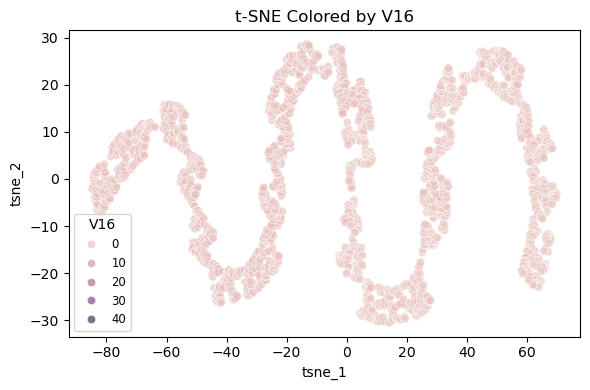

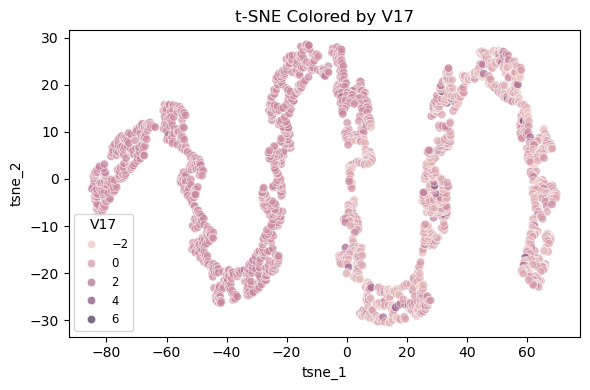

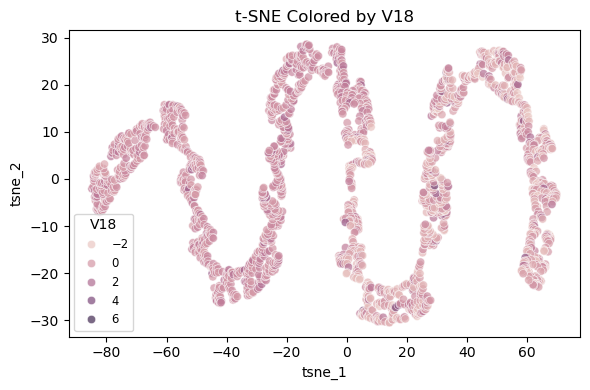

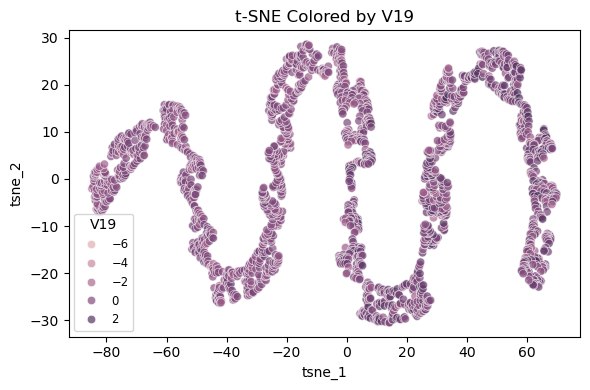

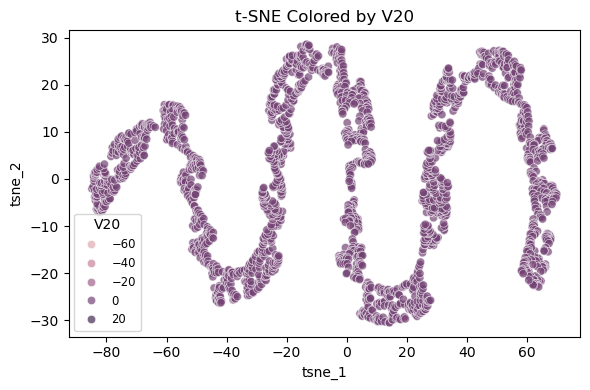

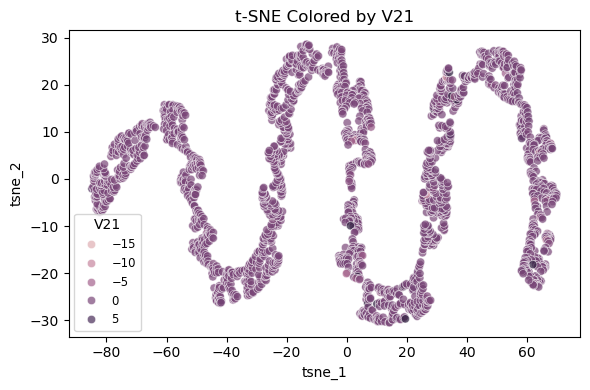

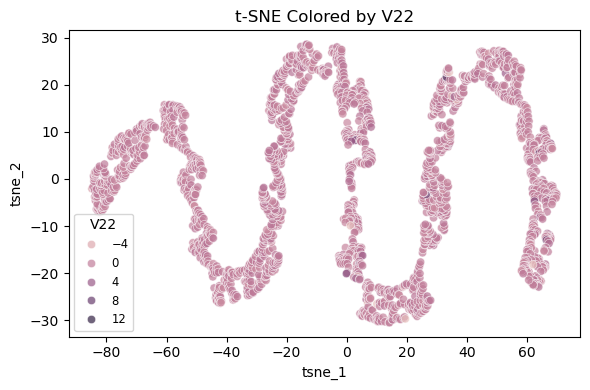

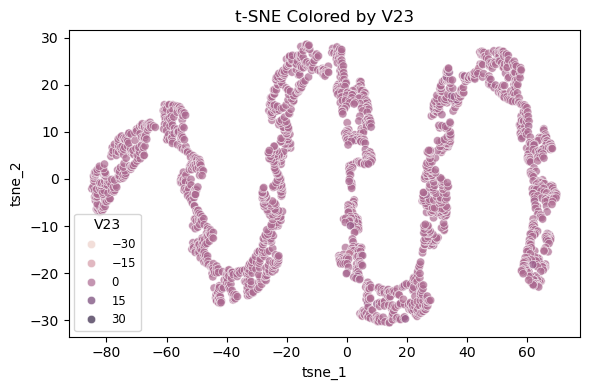

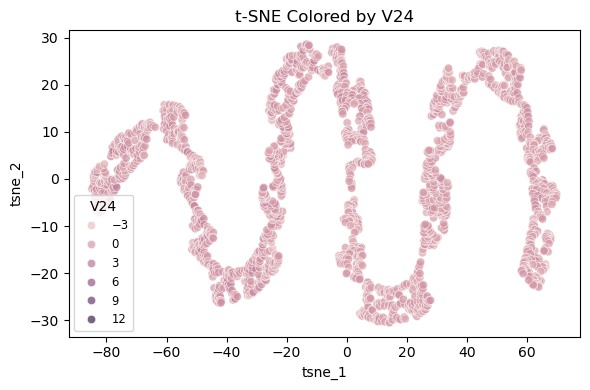

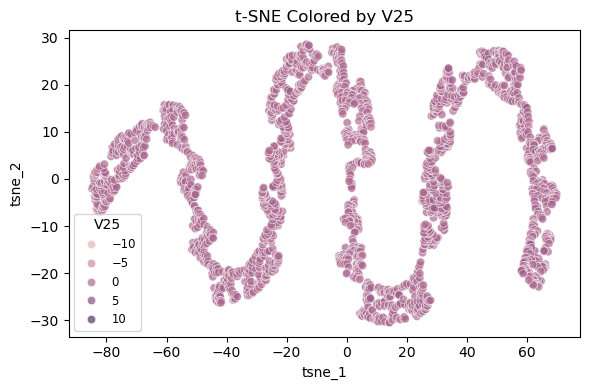

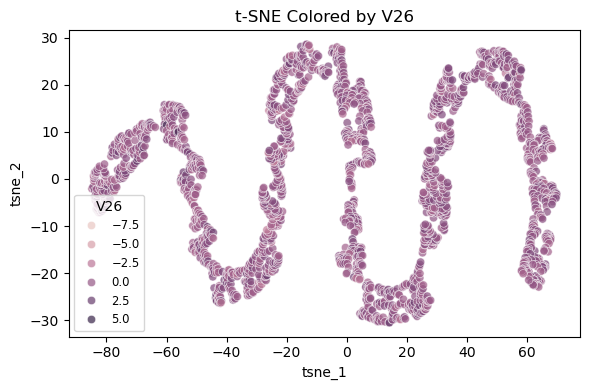

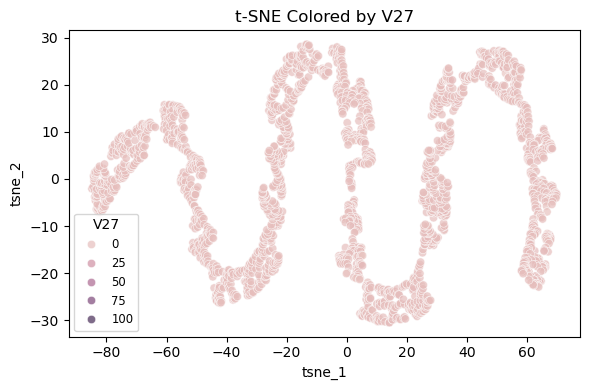

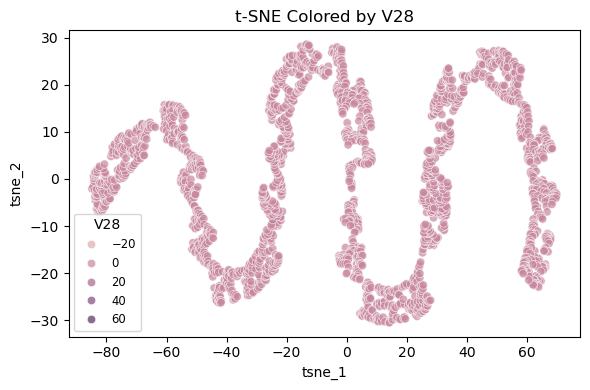

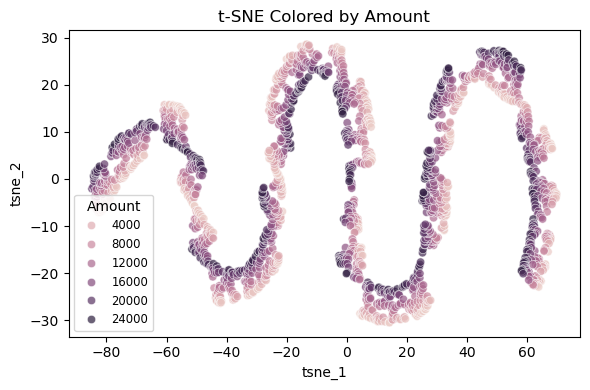

In [9]:
stats_df['tsne_1'] = X_tsne[:, 0]
stats_df['tsne_2'] = X_tsne[:, 1]

# Replace with your actual feature columns (excluding tsne_1, tsne_2, and target)
feature_cols = [col for col in df.columns if col not in ['id', 'tsne_1', 'tsne_2', 'Class']]

# Loop through each feature and plot
for feature in feature_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(
        data=stats_df,
        x='tsne_1', 
        y='tsne_2', 
        hue=df[feature],
        alpha=0.7
    )
    plt.title(f't-SNE Colored by {feature}')
    plt.legend(loc='best', fontsize='small', title=feature)
    plt.tight_layout()
    plt.show()


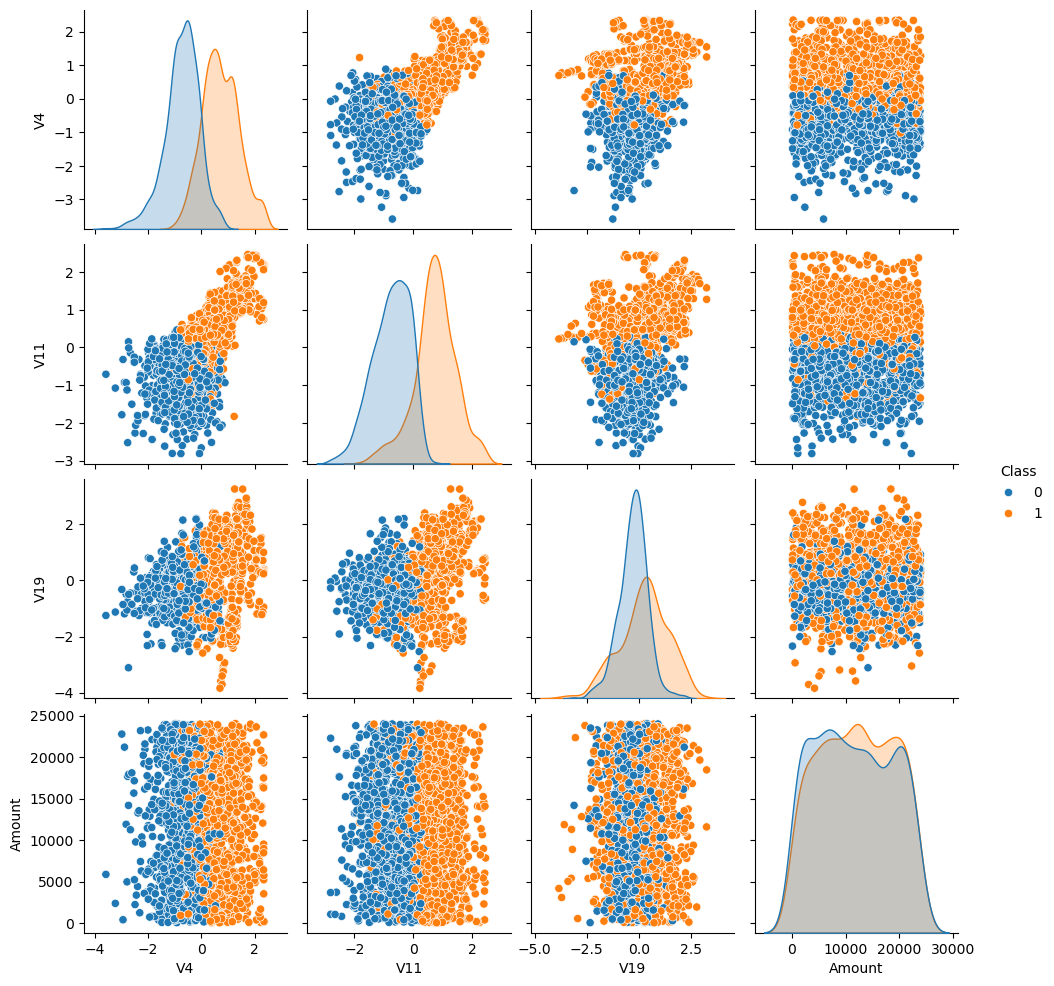

In [11]:
sns.pairplot(stats_df, vars=['V4', 'V11', 'V19', 'Amount'], hue='Class', diag_kind='kde')

## TSNE Interpretation

* Basesd on the tsne scatter plpos V4, v11,v19, and amount appear to all be relevant to the clustering produes by tsne
* From the pair plots it can be seen that v4, v11, v19 alone are usefult for distinguishing between classes
* When these are paired to geter or with amount the ability to distinguish between fraudulant activity is improved